# Plots for paper 1 #

Looking at the decadal predictability of surface variables over Europe

First set of plots will be a 2 x 2 matrix of skill plots (raw or lagged) for the different variables.

Then we will combine this with the long period lagged and var adjusted NAO plots.

In [1]:
# Notebook magic
%matplotlib inline
# Autoreload
%load_ext autoreload
%autoreload 2

# Local Imports
import os
import sys
import glob

# Third-Party Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Local imports
sys.path.append("/home/users/benhutch/skill-maps")
import dictionaries as dicts

# Import dicts from further afield
sys.path.append("/home/users/benhutch/energy-met-corr")
import dictionaries_em as dicts_em

# # Import functions from skill-maps
sys.path.append("/home/users/benhutch/skill-maps/python")
# import functions as fnc
import plotting_functions as plt_fnc

# Import functions
import functions as fnc

# Import functions from plot_init_benefit
sys.path.append("/home/users/benhutch/skill-maps/rose-suite-matching")
import plot_init_benefit as pib_fnc

# Import the nao_matching_seasons functions
import nao_matching_seasons as nao_match_fnc

# Import the functions from process_bs_values
import process_bs_values as pbs_func

# Import the functions from nao_alt_lag_functions
import nao_alt_lag_functions as nal_fnc

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [3]:
# Import the functions from paper1_plots_functions
import paper1_plots_functions as p1_fnc

## Exploring time series ###

E.g. looking at what happens with MSLP over the Rocky Mountains during winter, or over Greenland for MSLP during the summer compared to over the UK.

In [4]:
# nino34 = {
#     "lon1": -170,  # degrees east
#     "lon2": -120,
#     "lat1": -5,  # degrees north
#     "lat2": 5,
# }

In [5]:
# # Set up the variables
season = "ONDJFM"
forecast_range = "2-9"
start_year = 1961
end_year = 2014
lag = 4
alt_lag = "raw"
region = "global"
variable = "ua"
grid = dicts.lockwood_mslp_dipole_n  # Use the Lockwood MSLP dipole north grid box
gridbox_name = "Lockwood MSLP Dipole North"
data_dir = "/gws/nopw/j04/canari/users/benhutch/alternate-lag-processed-data/test-sfcWind"

In [6]:
# data = nal_fnc.load_data(
#     season=season,
#     forecast_range=forecast_range,
#     start_year=start_year,
#     end_year=end_year,
#     lag=lag,
#     method=alt_lag,
#     region=region,
#     variable=variable,
#     data_dir=data_dir,
# )

In [7]:
# importlib
import importlib

# Reload the dictionaries
importlib.reload(sys.modules["dictionaries"])

# Import the dictionaries
import dictionaries as dicts

# reload the p1 functions
importlib.reload(sys.modules["paper1_plots_functions"])

<module 'paper1_plots_functions' from '/home/users/benhutch/skill-maps/python/paper1_plots_functions.py'>

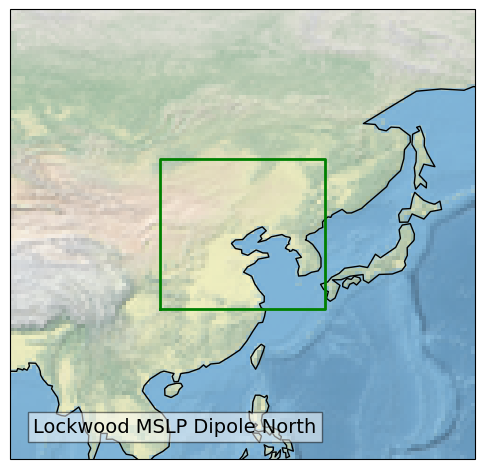

In [8]:
# Take a look at the rocky mountains grid box
p1_fnc.show_gridbox(
    grid=grid,
    grid_name=gridbox_name,
    figsize_x=6,
    figsize_y=6,
)

In [9]:
# # swap the 0th and 1st elements of the data
# data = np.swapaxes(data, 0, 1)

In [10]:
# data.shape

In [11]:
# season

In [12]:
# # skip over the first 3 elements of the data
# data_lag_temp = data[:, 3:, :, :]

# data_lag_temp.shape

In [13]:
# # plot the data
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# # plot the data using imshow
# ax.imshow(np.nanmean(data_lag_temp[:47, :, :, :], axis=(0, 1)), cmap="coolwarm")

In [14]:
# variable = "var131"

# obs_anoms = fnc.read_obs(
#             variable=variable,
#             region=region,
#             forecast_range="2-9",
#             season=season,
#             observations_path="/gws/nopw/j04/canari/users/benhutch/ERA5/global_regrid_sel_region_var131_85000.nc",
#             start_year=1960,
#             end_year=2023,
#             level=85000,
#         )

In [15]:
# # limit obs anoms to between 1969-01-01 and 2019-12-31
# obs_anoms = obs_anoms.sel(time=slice("1969-01-01", "2019-12-31"))

# # extrcat the values
# obs_anoms = obs_anoms.values

In [16]:
# # drwxr-sr-x 1 benhutch gws_canari 0 Jan  9 19:02 CanESM5
# ua_models = [
#     "CanESM5",
#     "MPI-ESM1-2-HR",
#     "BCC-CSM2-MR",
#     "CMCC-CM2-SR5",
#     "HadGEM3-GC31-MM",
#     "EC-Earth3",
#     "FGOALS-f3-L",
#     "MIROC6",
#     "IPSL-CM6A-LR"
# ]

In [17]:
# import numpy as np
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# from scipy.stats import pearsonr
# from tqdm import tqdm

# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors

# # Set up the first model
# model = ua_models[8]

# # set up the base path
# base_path = f"/gws/nopw/j04/canari/users/benhutch/saved_DePre/skill-maps-arrays/saved_data/{model}/AYULGS/ua/"

# # find the anoms .npy file
# anoms_file = glob.glob(f"{base_path}/*anoms.npy")[0]

# # Find the lats and lons
# lats_file = glob.glob(f"{base_path}/*lats.npy")[0]
# lons_file = glob.glob(f"{base_path}/*lons.npy")[0]

# # load the anoms
# anoms = np.load(anoms_file)

# # load the lats and lons
# lats = np.load(lats_file)
# lons = np.load(lons_file)

# # print the shape of the anoms
# print(anoms.shape)

# # print the shape of the lats and lons
# print(lats.shape)
# print(lons.shape)


# # set up the nrows and ncols using the number of members
# nrows = 5

# # based on the number of members, set up the ncols
# ncols = int(np.ceil(np.shape(anoms)[1] / nrows))

# # Set up the projection
# proj = ccrs.PlateCarree()

# # set up the fig and ax
# fig, axs = plt.subplots(nrows, ncols, figsize=(20, 20), subplot_kw={"projection": proj})

# # loop over the number of members
# for m in range(np.shape(anoms)[1]):
#     # Set THE AXES
#     ax = axs.flatten()[m]

#     # add the coastlines
#     ax.coastlines()

#     # plot the data
#     im = ax.pcolormesh(lons, lats, np.mean(anoms[:, m, :, :], axis=0), cmap="coolwarm", transform=proj)

#     # set the title
#     ax.set_title(f"Member {m + 1}")

# # SET A TIGHT LAYOUT
# plt.tight_layout()

# # # set up the max abs val
# # max_abs_value = np.max(np.abs(np.mean(anoms, axis=(0, 2, 3))))
# # min_value = -max_abs_value

# # # Create a diverging norm centered on zero
# # divnorm = mcolors.DivergingNorm(vmin=-max_abs_value, vcenter=0, vmax=max_abs_value)

# # # Apply the norm to your image
# # im.set_norm(divnorm)

# # Add the colorbar
# fig.colorbar(im, ax=axs, orientation="horizontal", label="Anomalies", pad=0.1, aspect=50, shrink=0.8, extend="both")

In [18]:
# # Set up the lats and lons
# lats = np.arange(-90, 90, 2.5)
# lons = np.arange(-180, 180, 2.5)

# member_cutoff = 47

# # Set up the projection
# proj = ccrs.PlateCarree()

# # Set up a figure
# fig, axs = plt.subplots(3, 1, figsize=(10, 20), subplot_kw={'projection': proj})

# # Plot the first set of data
# ax = axs[0]
# ax.coastlines()
# im = ax.contourf(lons, lats, np.mean(obs_anoms, axis=0), cmap="coolwarm")
# plt.colorbar(im, ax=ax, orientation="vertical")

# # set the title
# ax.set_title("Obs")

# # Plot the second set of data
# ax = axs[1]
# ax.coastlines()
# im = ax.contourf(lons, lats, np.mean(data_lag_temp[:member_cutoff, :, :, :], axis=(0, 1)), cmap="coolwarm")
# plt.colorbar(im, ax=ax, orientation="vertical")

# # set the title
# ax.set_title("Model")

# # Set up the shape of the corr timeseries
# corr_arr = np.zeros([len(lats), len(lons)])

# # set up the model data
# model_data = np.mean(data_lag_temp[:member_cutoff, :, :, :], axis=0)

# for lat in tqdm(range(len(lats))):
#     for lon in range(len(lons)):
#         # Assuming lat and lon are defined as indices
#         obs_cell = obs_anoms[:, lat, lon]
#         model_cell = model_data[:, lat, lon]

#         # # print the shape ofr obs cell and model cell
#         # print(obs_cell.shape, model_cell.shape)

#         corr_arr[lat, lon] = pearsonr(obs_cell, model_cell)[0]

# # set up the clevs
# # clevs = np.arange(-1.0, 1.1, 0.4)
# clevs = np.array([-1. , -0.8, -0.6, -0.4, -0.2, 0.2, 0.4, 0.6, 0.8, 1.0])
        

# # Plot the correlation
# ax = axs[2]
# ax.coastlines()
# im = ax.contourf(lons, lats, corr_arr, cmap="bwr", levels=clevs, extend="both")
# plt.colorbar(im, ax=ax, orientation="vertical")

# # set the title
# ax.set_title("Correlation")

# plt.show()

In [19]:
# import xarray as xr
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs

# fdir = "/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/AMJJAS/2-9/alt_lag/no_bootstraps_1000/"

# # extrcat the
# lats = np.arange(-90, 90, 2.5)
# lons = np.arange(-180, 180, 2.5)

# # extract the corr1 
# corr1 = np.load(glob.glob(f"{fdir}/corr1_psl*2-9.npy")[0])


# # Set up the figure with Cartopy projection
# fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# # Add coastlines
# ax.coastlines()

# # np.shape(ds["ua"].mean("time"))

# # set up the clevs
# # clevs = np.arange(-1.0, 1.1, 0.4)
# clevs = np.array([-1. , -0.8, -0.6, -0.4, -0.2, 0.2, 0.4, 0.6, 0.8, 1.0])

# # Plot the data
# im = ax.contourf(lons, lats, corr1, cmap="coolwarm", levels=clevs, extend="both")

# # Add colorbar
# fig.colorbar(im, ax=ax, orientation="horizontal", label="Anomalies", pad=0.1, aspect=50)

# # Show the plot
# plt.show()

In [20]:
# # swap the 0th and 1st elements of the data
# data_lag_temp = np.swapaxes(data_lag_temp, 0, 1)

In [21]:
# # take the data lag temp subset
# data_lag_temp_subset = data_lag_temp[:, 0:37, :, :]

In [22]:
# # print the mean of the data lag temp
# print(np.mean(data_lag_temp))

# # print the spread of the data lag temp
# print(np.std(data_lag_temp))

# # print the min and the max of the data lag temp
# print(np.min(data_lag_temp))
# print(np.max(data_lag_temp))

In [23]:
# # print the mean of the data lag temp
# print(np.mean(data_lag_temp_subset))

# # print the spread of the data lag temp
# print(np.std(data_lag_temp_subset))

# # print the min and the max of the data lag temp
# print(np.min(data_lag_temp_subset))
# print(np.max(data_lag_temp_subset))

In [24]:
# # if there are Nans in data_lag_temp_subset
# if np.isnan(data_lag_temp_subset).any():
#     # ptint the number of Nans in data_lag_temp_subset
#     print(np.sum(np.isnan(data_lag_temp_subset)))

In [25]:
# importlib.reload(sys.modules["paper1_plots_functions"])

In [26]:
# %tb

# # Load the time series for the rocky mountains
# rm_dict = p1_fnc.load_ts_data(
#     data=data,
#     season=season,
#     forecast_range=forecast_range,
#     start_year=start_year,
#     end_year=end_year,
#     lag=lag,
#     gridbox=grid,
#     gridbox_name=gridbox_name,
#     variable="ua",
#     alt_lag="nao_matched",  # Set to True to use the alternative lag, false raw
#     region=region,
#     level="85000",
# )

In [27]:
# # Set up a name for this array
# fname = f"{gridbox_name}_{season}_{forecast_range}_{start_year}_{end_year}_{lag}_{variable}_{alt_lag}_{region}"
# fname_obs = f"obs_{gridbox_name}_{season}_{start_year}_{end_year}_{variable}_{region}"

In [28]:
# save_df = "/home/users/benhutch/energy-met-corr-functions/saved_arrs/"

In [29]:
# # Set up the full path
# full_path = os.path.join(save_df, fname)

# # if the file does not exist, save it
# if not os.path.exists(full_path):
#     np.save(full_path, rm_dict["fcst_ts_members"])

# full_path_obs = os.path.join(save_df, fname_obs)

# # if the file does not exist, save it
# if not os.path.exists(full_path_obs):
#     np.save(full_path_obs, rm_dict["obs_ts"])

In [30]:
# # Load this into a pandas dataframe
# rm_df = p1_fnc.df_from_ts_dict(
#     ts_dict=rm_dict,
#     season=season,
#     forecast_range=forecast_range,
#     start_year=start_year,
#     end_year=end_year,
#     lag=lag,
#     gridbox_name="N_Europe_wind_box",
#     variable=variable,
#     alt_lag=alt_lag,  # Set to True to use the alternative lag, false raw
#     region=region,
# )

In [31]:
# rm_df.head()

In [32]:
# rm_dict.keys()

In [33]:
# # set up a figure
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# # plot the obs ts
# ax.plot(rm_dict["obs_ts"], label="obs")

In [34]:
# # print the mean of fcst_ts_mean
# print(np.mean(rm_dict["fcst_ts_mean"]))

# # print the spread of fcst_ts_mean
# print(np.std(rm_dict["fcst_ts_mean"]))

# # print the min and the max of fcst_ts_mean
# print(np.min(rm_dict["fcst_ts_mean"]))
# print(np.max(rm_dict["fcst_ts_mean"]))

In [35]:
import importlib

importlib.reload(sys.modules["paper1_plots_functions"])

<module 'paper1_plots_functions' from '/home/users/benhutch/skill-maps/python/paper1_plots_functions.py'>

In [36]:
# rm_dict["fcst_ts_members"].shape

In [37]:
# # # Plot the time series
# p1_fnc.plot_ts(
#     ts_dict=rm_dict,
#     figsize_x=10,
#     figsize_y=5,
#     short_period=False,
#     standardise=False,
#     do_detrend=False,
#     title="Observed N. Europe 850U (black) and \n dcppA N. Europe 850U (red)",
#     label="b",
#     fontsize=14,
#     calc_rmse=True,
# )

In [38]:
# # Plot the time series
# p1_fnc.plot_ts(
#     ts_dict=rm_dict,
#     figsize_x=10,
#     figsize_y=4,
#     short_period=False,
#     standardise=False,
#     do_detrend=True,
# )

In [39]:
# # Create two copies of the data
# rm_dict_copy = rm_dict.copy()
# rm_dict_copy2 = rm_dict.copy()

In [40]:
# # Set the constrain years
# constrain_years = np.arange(1961, 2005 + 1)

# # Test the plotting function
# p1_fnc.plot_ts(
#     ts_dict=rm_dict_copy,
#     figsize_x=10,
#     figsize_y=6,
#     trendline=True,
#     constrain_years=constrain_years,
# )

In [41]:
# # Set the constrain years
# constrain_years = np.arange(2005, 2014 + 1)

# # Test the plotting function
# p1_fnc.plot_ts(
#     ts_dict=rm_dict_copy2,
#     figsize_x=10,
#     figsize_y=6,
#     trendline=True,
#     constrain_years=constrain_years,
# )

In [42]:
# Set up the variables
variables = ["psl", "psl"]
no_bootstraps_list = [1000, 1000]
no_bootstraps_list2 = [1]
season = "ONDJFM"
model_season = "ONDJFM"
forecast_range = "2-9"

methods1 = ["new_raw", "new_raw", "new_raw", "new_raw"]
gridbox_corr_list = [
    dicts.lockwood_mslp_dipole_n,
    dicts.lockwood_mslp_dipole_s,
]
# methods2 = ["new_raw", "new_raw"]
# methods_diff = "NAO-matched - lag"
# # method = "new_raw"

In [43]:
# Check whether the files exist
existing_files = p1_fnc.check_bootstraps_exist(
    variables=variables,
    no_bootstraps=no_bootstraps_list,
    season=season,
    forecast_range=forecast_range,
    method=methods1,
)

Checking whether bootstraps exist for method new_raw...
Checking whether bootstraps exist for variable psl...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for variable psl...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for method new_raw...
Checking whether bootstraps exist for variable psl...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for variable psl...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for method new_raw...
Checking whether bootstraps exist for variable psl...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for variable psl...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for method new_raw...
Checking whether bootstraps exist for variable psl...
Checking whether bootstraps exist for 1000 bootstraps...

In [44]:
# # Check whether the files exist for the otehr method
# existing_files2 = p1_fnc.check_bootstraps_exist(
#     variables=variables,
#     no_bootstraps=no_bootstraps_list,
#     season=season,
#     forecast_range=forecast_range,
#     method=methods2,
# )

In [45]:
# print(existing_files)

In [46]:
# Import importlib
import importlib

# Reload the module
importlib.reload(sys.modules["paper1_plots_functions"])

# Import the function again
import paper1_plots_functions as p1_fnc

In [47]:
# Form the stats dictionaries for these
stats_dicts1 = p1_fnc.create_bs_dict(
    variables=variables,
    no_bootstraps=no_bootstraps_list,
    season=season,
    forecast_range=forecast_range,
    methods=methods1,
    model_season=model_season,
    load_hist=False,
)

# /gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/ONDJFM/2-9/new_raw/no_bootstraps_100/

Processing variable psl...
Processing 1000 bootstraps...
base_path = /gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/ONDJFM/2-9/new_raw/no_bootstraps_1000
Processing variable psl...
Processing 1000 bootstraps...
base_path = /gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/ONDJFM/2-9/new_raw/no_bootstraps_1000


In [48]:
# # # # keys in the dictionary
# stats_dicts1[('tas', 'nboot_1000', 'new_raw')].keys()


In [49]:
# stats_dicts2 = p1_fnc.create_bs_dict(
#     variables=variables,
#     no_bootstraps=no_bootstraps_list2,
#     season=season,
#     forecast_range=forecast_range,
#     methods=methods2,
#     model_season=model_season,
# )

In [50]:
# # Print the keys for stats_dicts2
# stats_dicts2.keys()

In [51]:
# Import importlib
import importlib

# Reload the module
importlib.reload(sys.modules["paper1_plots_functions"])
importlib.reload(sys.modules["dictionaries"])

# Import the function again
import paper1_plots_functions as p1_fnc
import dictionaries as dicts

In [52]:
print(stats_dicts1.keys())

dict_keys([('psl', 'nboot_1000', 'new_raw')])


In [88]:
import importlib

importlib.reload(sys.modules["paper1_plots_functions"])

<module 'paper1_plots_functions' from '/home/users/benhutch/skill-maps/python/paper1_plots_functions.py'>

In [89]:
season

'ONDJFM'

In [90]:
# stats_dicts1[('tas', 'nboot_1000', 'new_raw')].keys()

Setting up the axis...
variables = ['psl']
Plotting the correlations for a single method...
Plotting variable ('psl', 'nboot_1000', 'new_raw')...
Plotting index 0...
start_year = [1966 2010]
end_year = [1966 2010]
nens1 = 178
for variable ('psl', 'nboot_1000', 'new_raw')
fcst1_ts.shape = (54, 72, 144)
obs_ts.shape = (54, 72, 144)
Constraining data to gridbox_plot...
As defined by gridbox_plot =  {'lon1': -10, 'lon2': 180, 'lat1': 10, 'lat2': 70}
Setting up axis 3rd/4th time this?
Calculating the correlations with a specific gridbox...
As defined by gridbox_corr =  {'lon1': 108, 'lon2': 130, 'lat1': 30, 'lat2': 50}
Variable is not psl
Only using alt lag for bootstrapping ts here
------------------------------------------
Using psl, so using the original method_load
method load: new_raw
Files found for raw data: ['/gws/nopw/j04/canari/users/benhutch/alternate-lag-processed-data/psl_ONDJFM_global_1961_2014_2-9_4_1708351636.9116843.npy', '/gws/nopw/j04/canari/users/benhutch/alternate-lag-p

/home/users/benhutch/skill-maps/python/nao_alt_lag_functions.py:224: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  datetimes = [pd.to_datetime(datetime, unit="s") for datetime in datetimes]


Shape of the data: (54, 178, 9, 72, 144)
------------------------------------------
Bootstrapping where variable is psl
fcst_ts_members_mean_n.shape = (54, 178)
fcst_ts_members_mean_s.shape = (54, 178)
n_times = 54
nens = 54
fcst_ts_members_mean_n.shape = (54, 178)
fcst_ts_members_mean_s.shape = (54, 178)
fcst1_ts_mean_n values = [ -2.44301526  11.95001746  -4.7241928    5.7417662   -1.66451093
   8.59809363   5.75425341   6.07619534   1.35645027   7.97965563
   4.84194653   5.29701902   6.22725088   4.21362983  -0.9771074
   1.99512374  -4.49614717   1.36694961   4.93162539   4.95924917
   7.60763516  -1.06909233   0.72299015   0.53001718   5.9161223
   7.03367914   6.89973158   5.52481121   5.82683252   7.98562656
  -0.14387449  -0.58612861  -4.59918457  -3.26427133  -3.99529069
  -5.29654034  -3.80930651  -2.11791276  -1.42514156  -5.46286236
  -5.34970744  -3.97730186  -5.78975819  -8.13979443  -4.64162785
  -7.95181065  -3.43038723  -5.30180612  -1.91211745  -2.67730637
  -3.35085

100%|██████████| 1000/1000 [00:02<00:00, 357.23it/s]


computed resampled (time only) north box r = 0.0604364265004253, p = 0.151
computed resampled (time only) south box r = 0.6915993245686788, p = 0.001
computed resampled (time + members) north box r = 0.036402242210446814, p = 0.183
computed resampled (time + members) south box r = 0.6945022411321551, p = 0.001
fig:  Figure(2000x1000)
axes:  [<GeoAxes: >]
type(axes):  <class 'list'>


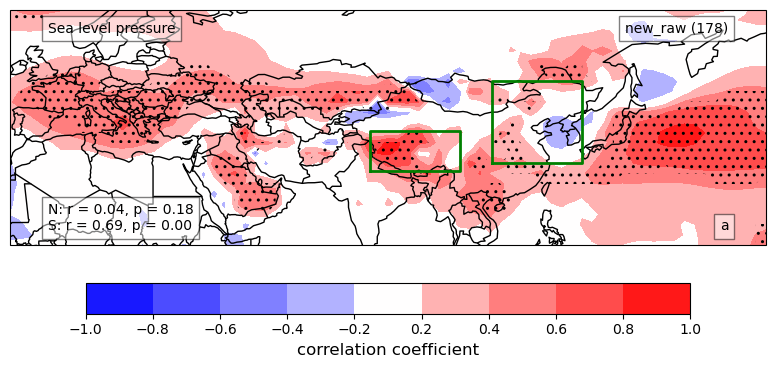

In [93]:
# Plot the skill maps
p1_fnc.plot_diff_variables(
    bs_skill_maps=stats_dicts1,
    season=model_season,
    forecast_range=forecast_range,
    method_load="new_raw",
    methods=methods1,
    figsize_x=20,
    figsize_y=10,
    gridbox_corr=gridbox_corr_list,
    gridbox_plot=dicts.asia_grid_plot,
    winter_n_gridbox_corr=dicts.lockwood_mslp_dipole_n,
    winter_s_gridbox_corr=dicts.lockwood_mslp_dipole_s,
    corr_list=["corr1", "corr1", "corr1", "corr1"],
    ts_list=["f1_ts", "f1_ts", "f1_ts", "f1_ts"],
    fontsize=10,
)

In [56]:
# Same but for the alt_lag method
stats_dicts = p1_fnc.create_bs_dict(
    variables=variables,
    no_bootstraps=no_bootstraps_list,
    season=season,
    forecast_range=forecast_range,
    method="alt_lag",
)

TypeError: create_bs_dict() got an unexpected keyword argument 'method'

In [ ]:
# Plot the skill maps
p1_fnc.plot_diff_variables(
    bs_skill_maps=stats_dicts,
    season=season,
    forecast_range=forecast_range,
    figsize_x=12,
    figsize_y=10,
    gridbox_corr=dicts.uk_grid,
    gridbox_plot=dicts.pacific_grid_plot,
)

In [ ]:
# Same but for years 2-5
forecast_range = "2-5"

# Form the stats dictionaries for these
stats_dicts = p1_fnc.create_bs_dict(
    variables=variables,
    no_bootstraps=no_bootstraps_list,
    season=season,
    forecast_range=forecast_range,
    method="new_raw",
)

In [ ]:
# Plot the skill maps
p1_fnc.plot_diff_variables(
    bs_skill_maps=stats_dicts,
    season=season,
    forecast_range=forecast_range,
    figsize_x=12,
    figsize_y=10,
    gridbox_corr=dicts.uk_grid,
    gridbox_plot=dicts.north_atlantic_grid_plot,
)

In [ ]:
# Same but for the alt_lag method
stats_dicts = p1_fnc.create_bs_dict(
    variables=variables,
    no_bootstraps=no_bootstraps_list,
    season=season,
    forecast_range=forecast_range,
    method="alt_lag",
)

In [ ]:
# Plot the skill maps
p1_fnc.plot_diff_variables(
    bs_skill_maps=stats_dicts,
    season=season,
    forecast_range=forecast_range,
    figsize_x=12,
    figsize_y=10,
    gridbox_corr=dicts.uk_grid,
    gridbox_plot=dicts.north_atlantic_grid_plot,
)

In [ ]:
# Set up global variables
bootstrap_base_dir = "/gws/nopw/j04/canari/users/benhutch/bootstrapping"
plots_dir = "/home/users/benhutch/skill-maps-europe"
region = "global"
forecast_range = "2-9"

# Set up the lists
seasons_list = ["DJFM", "MAM", "JJA", "SON"]
methods_list = ["raw", "lagged", "nao_matched"]
variables_list = [
    "tas",
    "sfcWind",
    "rsds",
    "psl",
]  # Will replace psl with pr at some point

### Testing bootstrapping function ###

The function *forecast_stats* generates all of the forecast stats, however, it currently only runs between 1969 and 2011 (?). We want to test this function so we can calculate the raw forecast stats from initialisation in 1961 to initialisation in 2014.

For now, we don't care about the historical models (forecast2).

In [ ]:
# First we need to prepare the data for this
# Set up the parameters
variable = "tas"
season = "DJFM"
start_year = 1961  # first init year for BCC-CSM2-MR
end_year = 2014  # last valid init year for year 2-9 forecasts
method = "raw"  # Raw forecast skill in the first instance
no_bootstraps = 1  # For speed, just do one bootstrap
base_dir = "/home/users/benhutch/skill-maps-processed-data"

In [ ]:
# Set up the dcpp models for this variable
dcpp_models = nao_match_fnc.match_variable_models(match_var=variable)

In [ ]:
# Set up the observations path for the matching variable
obs_path = nao_match_fnc.find_obs_path(match_var=variable)

In [ ]:
# Prrocess the observations
obs = fnc.process_observations(
    variable=variable,
    region=region,
    region_grid=dicts.gridspec_global,
    forecast_range=forecast_range,
    season=season,
    observations_path=obs_path,
    obs_var_name="t2m",
)

In [ ]:
# Load and process the dcpp model data
dcpp_data = pbs_func.load_and_process_dcpp_data(
    base_dir=base_dir,
    dcpp_models=dcpp_models,
    variable=variable,
    region=region,
    forecast_range=forecast_range,
    season=season,
)

In [ ]:
print((dcpp_data["BCC-CSM2-MR"]))

In [ ]:
# We want to make sure that the obs and dcpp data are aligned
dcpp_data = fnc.constrain_years(dcpp_data, dcpp_models)

In [ ]:
print((dcpp_data["BCC-CSM2-MR"]))

In [ ]:
# Align the obs and dcpp data
obs, dcpp_data, _ = fnc.remove_years_with_nans_nao(
    observed_data=obs, model_data=dcpp_data, models=dcpp_models
)

In [ ]:
print((dcpp_data["BCC-CSM2-MR"]))
print((obs))

In [ ]:
# Convert obs to an array
obs = obs.values

# Print the shapes of the obs data
print(np.shape(obs))

# Extract the years from the obs data
nyears = obs.shape[0]
lats = obs.shape[1]
lons = obs.shape[2]

In [ ]:
# Covert dcpp_data to an array
# Create an empty array
dcpp_ensemble_members = np.sum([len(dcpp_data[model]) for model in dcpp_models])

# Create an empty array to store the data
dcpp_data_array = np.zeros([dcpp_ensemble_members, nyears, lats, lons])

# Create a dummy arrays of zeros to store the ensemble members
hist_data_array = np.zeros([dcpp_ensemble_members, nyears, lats, lons])

# Set up the member index
member_index = 0

# Loop over the models
for model in dcpp_models:
    dcpp_model_data = dcpp_data[model]

    # Loop over the ensemble members
    for member in dcpp_model_data:
        # Increment the member index
        member_index += 1

        # Extract the data
        data = member.values

        # If the data has four dimensions
        if len(data.shape) == 4:
            # Squeeze the data
            data = np.squeeze(data)

        # Assign the data to the forecast1 array
        dcpp_data_array[member_index - 1, :, :, :] = data

        # Assign the data to the hist array
        hist_data_array[member_index - 1, :, :, :] = data

In [ ]:
# print the shape os the obs and dcpp data
print(np.shape(obs))

# print the shape of the dcpp data array
print(np.shape(dcpp_data_array))
print(np.shape(hist_data_array))

In [ ]:
# # Fill the hist data array with 1s
# hist_data_array[:] = 1

In [ ]:
# Print the dcpp data array
print(dcpp_data_array)

In [ ]:
# Print the hist data array
print(hist_data_array)

In [ ]:
# Process the forecast stats for the raw method
forecast_stats = fnc.forecast_stats(
    obs=obs, forecast1=dcpp_data_array, forecast2=hist_data_array, no_boot=no_bootstraps
)

In [ ]:
print(forecast_stats)

### Next steps ###

We have now processed the data for one variable (tas), DJFM, years 2-9. To create the 2x2 matrix of plots for the different variables, we have to do this another three times to generate four dictionaries of forecast stats. It may therefore be worth condensing the above into a function.

In [ ]:
from paper1_plots_functions import forecast_stats_var

In [ ]:
# Use importlib to reload the module
import importlib

# Reload the module
importlib.reload(sys.modules["paper1_plots_functions"])

# Import the function again
from paper1_plots_functions import forecast_stats_var

In [ ]:
# Test the forecast stats var function
forecast_stats_var_dic, nao_stats_dic = forecast_stats_var(
    variables=dicts.paper_1_variables,
    season="DJFM",
    forecast_range=forecast_range,
    start_year=start_year,
    end_year=end_year,
    method=method,
    no_bootstraps=no_bootstraps,
)

In [ ]:
print(nao_stats_dic)

In [ ]:
print((forecast_stats_var_dic["rsds"]))

In [ ]:
# Now we want to plot this data
# Use importlib to reload the module
import importlib

# Reload the module
importlib.reload(sys.modules["paper1_plots_functions"])

# Import the function again
from paper1_plots_functions import forecast_stats_var, plot_forecast_stats_var

In [ ]:
# Test this new function
plot_forecast_stats_var(
    forecast_stats_var_dic=forecast_stats_var_dic,
    nao_stats_dict=nao_stats_dic,
    psl_models=dicts.psl_models,
    forecast_range=forecast_range,
    figsize_x=12,
    figsize_y=10,
    gridbox_corr=dicts.uk_grid,
    gridbox_plot=dicts.north_atlantic_grid_plot,
)

In [ ]:
print((forecast_stats_var_dic["sfcWind"]["corr1_p"]))

corr1_p = forecast_stats_var_dic["sfcWind"]["corr1_p"]

print((corr1_p[0, 0]))

In [ ]:
# Now we want to plot this data
# Use importlib to reload the module
import importlib

# Reload the module
importlib.reload(sys.modules["paper1_plots_functions"])

# Import the function again
from paper1_plots_functions import forecast_stats_var, plot_forecast_stats_var

In [ ]:
# Now change the season to JJA
forecast_stats_var_dic_jja, nao_stats_dic_jja = forecast_stats_var(
    variables=dicts.paper_1_variables,
    season="JJA",
    forecast_range=forecast_range,
    start_year=start_year,
    end_year=end_year,
    method=method,
    no_bootstraps=no_bootstraps,
)

In [ ]:
# And plot this
plot_forecast_stats_var(
    forecast_stats_var_dic=forecast_stats_var_dic_jja,
    nao_stats_dict=nao_stats_dic_jja,
    psl_models=dicts.psl_models,
    season="JJA",
    forecast_range=forecast_range,
    figsize_x=12,
    figsize_y=10,
    gridbox_corr=dicts.uk_grid,
    gridbox_plot=dicts.north_atlantic_grid_plot,
)

In [ ]:
# # Exploring bootstrapped
# # corr1_p output for psl JJA 1000 bootstraps
# dir = "/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/JJA/2-9/raw/no_bootstraps_1000"
# filename="corr1_p_psl_global_JJA_2-9.npy"

# # Load the data
# corr1_p_psl_jja = np.load(os.path.join(dir, filename))

### Plotting NAO time series ###

We also want to plot the NAO time series in this plot. First of all just the raw time series, then it would be nice to have the lagged and variance-adjusted time series as well. First let's see what we functions we can use from other files.